In [1]:
import numpy as np
import pandas as pd
import re
import sys
import nltk
import spacy
import string
import matplotlib
pd.options.mode.chained_assignment = None

In [2]:
# Read data file

filename = 'Intent_classification_filtered.xlsx'

df = pd.read_excel(filename)

df

,Models,Intents,Label,Content
0,P1-Ant2Maven.atl,Abstraction Category,1,module Ant2Maven;\n\n\n\ncreate OUTMaven : Mav...
1,P1-Maven2XML.atl,Semantic Definition Category,2,module Maven2XML;\n\n\n\ncreate XML1 : XMLMav...
2,P46-Ant2XML.atl,Semantic Definition Category,2,module Ant2XML;\n\n\n\ncreate OUT : XML from I...
3,P1-XML2Ant.atl,Refinement Category,0,module XML2Ant;\n\n\n\ncreate OUT : Ant from I...
4,P59-XML2XML.atl,Editing Category,6,module XML2XML;\n\n\n\ncreate OUT : XML from I...
...,...,...,...,...
169,P51-Table2SVGBarChart.atl,Language Translation Category,3,module Table2SVG; \n\ncreate OUT : SVG from IN...
170,P51-Table2SVGPieChart.atl,Language Translation Category,3,module Table2SVG; \n\ncreate OUT : SVG from IN...
171,P51-Table2TabularHTML.atl,Language Translation Category,3,module Table2HTML; \n\ncreate OUT : HTML from ...
172,P53-METAH2ACME.atl,Editing Category,6,module METAH2ACME;\n\n\n\ncreate OUT : ACME fr...


In [3]:
#to see the comparison in full column values 
#pd.set_option('display.max_colwidth', 1)

# Lowercase the content

df['Content_lower'] = df['Content'].str.lower()
df.head()

,Models,Intents,Label,Content,Content_lower
0,P1-Ant2Maven.atl,Abstraction Category,1,module Ant2Maven;\n\n\n\ncreate OUTMaven : Mav...,module ant2maven;\n\n\n\ncreate outmaven : mav...
1,P1-Maven2XML.atl,Semantic Definition Category,2,module Maven2XML;\n\n\n\ncreate XML1 : XMLMav...,module maven2xml;\n\n\n\ncreate xml1 : xmlmav...
2,P46-Ant2XML.atl,Semantic Definition Category,2,module Ant2XML;\n\n\n\ncreate OUT : XML from I...,module ant2xml;\n\n\n\ncreate out : xml from i...
3,P1-XML2Ant.atl,Refinement Category,0,module XML2Ant;\n\n\n\ncreate OUT : Ant from I...,module xml2ant;\n\n\n\ncreate out : ant from i...
4,P59-XML2XML.atl,Editing Category,6,module XML2XML;\n\n\n\ncreate OUT : XML from I...,module xml2xml;\n\n\n\ncreate out : xml from i...


In [4]:
#remove punctuations and symbols

punct_remove = string.punctuation

#To remove carriage return (\r), new line (\n) and tab (\t)

#df = df.replace(r'\r+|\n+|\t+','', regex=True)


#df['Content_wo_punct'] = df['Content_lower'].apply(lambda text: text.translate(str.('','',punct_remove)))
#df['Content_wo_punct'] = df['Content_wo_punct'].apply(lambda x : " ".join(re.findall('[\w]+',x)))

#df['Content_wo_punct'] = df['Content_wo_punct'].str.replace('\d+', '',regex=True)


df['Content_wo_punct'] = df['Content_lower'].str.replace('\d+', '',regex=True)

df['Content_wo_punct'] = df['Content_wo_punct'].apply(lambda text: text.translate(str.maketrans('','',punct_remove)))

df['Content_wo_punct'] = df['Content_wo_punct'].str.replace(r'\r+|\n+|\t+',' ', regex=True)

df['Content_wo_punct'] = df['Content_wo_punct'].str.split().agg(" ".join)

#df['stripped'] = df['Content_wo_punct2'].str.rstrip()

#df['stripped'] = df['stripped'].str.replace(r'  ',' ', regex=True)

#df['stripped'] = df['stripped'].str.replace(r'   ',' ', regex=True)

#df['stripped'] = df['stripped'].str.replace(r'    ',' ', regex=True)

#df['stripped'] = df.Content_wo_punct2.str.replace('^ +| +$', ' ', regex=True)

#df['stripped'] = df['stripped'].str.strip()

#df['stripped'] = df['Content_wo_punct2'].str.split().agg(" ".join)

df.head()

,Models,Intents,Label,Content,Content_lower,Content_wo_punct
0,P1-Ant2Maven.atl,Abstraction Category,1,module Ant2Maven;\n\n\n\ncreate OUTMaven : Mav...,module ant2maven;\n\n\n\ncreate outmaven : mav...,module antmaven create outmaven mavenmaven out...
1,P1-Maven2XML.atl,Semantic Definition Category,2,module Maven2XML;\n\n\n\ncreate XML1 : XMLMav...,module maven2xml;\n\n\n\ncreate xml1 : xmlmav...,module mavenxml create xml xmlmaven xml xmlpro...
2,P46-Ant2XML.atl,Semantic Definition Category,2,module Ant2XML;\n\n\n\ncreate OUT : XML from I...,module ant2xml;\n\n\n\ncreate out : xml from i...,module antxml create out xml from in ant helpe...
3,P1-XML2Ant.atl,Refinement Category,0,module XML2Ant;\n\n\n\ncreate OUT : Ant from I...,module xml2ant;\n\n\n\ncreate out : ant from i...,module xmlant create out ant from in xml helpe...
4,P59-XML2XML.atl,Editing Category,6,module XML2XML;\n\n\n\ncreate OUT : XML from I...,module xml2xml;\n\n\n\ncreate out : xml from i...,module xmlxml create out xml from in xml helpe...


In [5]:
#removal of stopwords

from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

df['Content_wo_stopwords'] = df['Content_wo_punct'].apply(lambda text: (" ".join([word for word in str(text).split() if word not in stopwords])))

df.head()


,Models,Intents,Label,Content,Content_lower,Content_wo_punct,Content_wo_stopwords
0,P1-Ant2Maven.atl,Abstraction Category,1,module Ant2Maven;\n\n\n\ncreate OUTMaven : Mav...,module ant2maven;\n\n\n\ncreate outmaven : mav...,module antmaven create outmaven mavenmaven out...,module antmaven create outmaven mavenmaven out...
1,P1-Maven2XML.atl,Semantic Definition Category,2,module Maven2XML;\n\n\n\ncreate XML1 : XMLMav...,module maven2xml;\n\n\n\ncreate xml1 : xmlmav...,module mavenxml create xml xmlmaven xml xmlpro...,module mavenxml create xml xmlmaven xml xmlpro...
2,P46-Ant2XML.atl,Semantic Definition Category,2,module Ant2XML;\n\n\n\ncreate OUT : XML from I...,module ant2xml;\n\n\n\ncreate out : xml from i...,module antxml create out xml from in ant helpe...,module antxml create xml ant helper def concat...
3,P1-XML2Ant.atl,Refinement Category,0,module XML2Ant;\n\n\n\ncreate OUT : Ant from I...,module xml2ant;\n\n\n\ncreate out : ant from i...,module xmlant create out ant from in xml helpe...,module xmlant create ant xml helper defgetlist...
4,P59-XML2XML.atl,Editing Category,6,module XML2XML;\n\n\n\ncreate OUT : XML from I...,module xml2xml;\n\n\n\ncreate out : xml from i...,module xmlxml create out xml from in xml helpe...,module xmlxml create xml xml helper context xm...


In [6]:
#sort the values

#df['sorted'] = df['Content_wo_stopwords'].apply(lambda x: ''.join(sorted(x.split(', '))))

#print('\n==========content_without_stop_words==============\n\n', df['Content_wo_stopwords'].head(1))

#print('\n\n==========content_Sorted_without_stop_words==============\n\n', df['sorted'].head(1))

In [7]:
#count of frequent words

from collections import Counter

count = Counter()

for text in sorted(df['Content_wo_stopwords'].values):
    for content_text in sorted(text.split()):
        count[content_text] = count[content_text] + 1
sorted(count.most_common(5))

[('else', 1361),
 ('endif', 1290),
 ('name', 2238),
 ('rule', 1652),
 ('value', 938)]

In [8]:
#sorting content based on frequent words

frequent_words = sorted(set([content_text for (content_text, text_count) in sorted(count.most_common(5))]))

df['Content_sorted'] = df['Content_wo_stopwords'].apply(lambda text: (" ".join([content_text for content_text in sorted(text.split())])))


In [9]:
print('==========content_original==============\n\n', df['Content'].head(1))

print('\n==========content_without_punctuation_words==============\n\n', df['Content_wo_punct'].head(1))

print('\n==========content_without_stop_words==============\n\n', df['Content_wo_stopwords'].head(1))

print('\n==========content_sorted_with_frequency_words_length==============\n\n', df['Content_sorted'].head(1))

==========content_original==============

 0    module Ant2Maven;\n\n\n\ncreate OUTMaven : Mav...
Name: Content, dtype: object

==========content_without_punctuation_words==============

 0    module antmaven create outmaven mavenmaven out...
Name: Content_wo_punct, dtype: object

==========content_without_stop_words==============

 0    module antmaven create outmaven mavenmaven out...
Name: Content_wo_stopwords, dtype: object

==========content_sorted_with_frequency_words_length==============

 0    aattributes aauthor abasedir abasedir abasedir...
Name: Content_sorted, dtype: object


In [10]:
pd.set_option('display.max_colwidth', 50)

#removal of rare words

#N=20

#rare_words = set([content_text for (content_text, text_count) in count.most_common(20)[:-N-1:-1]])

#df['Content_wo_rare'] = df['Content_wo_freq'].apply(lambda content_text: (" ".join([content_text for content_text in str(text).split() if content_text not in rare_words])))

#df

In [11]:
print('==========content_original_length==============\n', df['Content'].str.len())

print('\n==========content_without_punctuation_words_length==============\n', df['Content_wo_punct'].str.len())

print('\n==========content_without_stop_words_length==============', df['Content_wo_stopwords'].str.len())

print('\n==========content_sorted_with_frequency_words_length==============', df['Content_sorted'].str.len())


==========content_original_length==============
 0       6956
1       9501
2       7448
3      10542
4       1598
       ...  
169     4363
170     5120
171     2350
172     3796
173     3846
Name: Content, Length: 174, dtype: int64

==========content_without_punctuation_words_length==============
 0      4524
1      6298
2      4636
3      6643
4       914
       ... 
169    2582
170    2997
171    1466
172    2324
173    2639
Name: Content_wo_punct, Length: 174, dtype: int64

==========content_without_stop_words_length============== 0      4145
1      5921
2      4292
3      6108
4       846
       ... 
169    2493
170    2884
171    1392
172    2218
173    2516
Name: Content_wo_stopwords, Length: 174, dtype: int64

==========content_sorted_with_frequency_words_length============== 0      4145
1      5921
2      4292
3      6108
4       846
       ... 
169    2493
170    2884
171    1392
172    2218
173    2516
Name: Content_sorted, Length: 174, dtype: int64


In [12]:
#https://www.geeksforgeeks.org/snowball-stemmer-nlp/#:~:text=Difference%20Between%20Porter%20Stemmer%20and,more%20aggressive%20than%20Porter%20Stemmer.&text=The%20difference%20between%20the%20two,to%20a%20more%20accurate%20stem.
#https://stackoverflow.com/questions/10554052/what-are-the-major-differences-and-benefits-of-porter-and-lancaster-stemming-alg


#from nltk.stem.snowball import SnowballStemmer

# init stemmer

#snowball_stemmer = SnowballStemmer('english')

# Stemming

#df['Content_wo_stem'] = df['Content_sorted'].apply(lambda content_text: [snowball_stemmer.stem(content_text)])

#df['Content_wo_stem']

In [13]:
#df['cleaned_content'] = df['Content_wo_stem']

df['cleaned_content'] = df['Content_sorted']

In [14]:
print('==========Original_Content_length==============\n', df['Content'].str.len())
print('\n\n********************************\n\n')
print('==========Cleaned_Content_Length==============\n', df['cleaned_content'].str.len())

==========Original_Content_length==============
 0       6956
1       9501
2       7448
3      10542
4       1598
       ...  
169     4363
170     5120
171     2350
172     3796
173     3846
Name: Content, Length: 174, dtype: int64


********************************


==========Cleaned_Content_Length==============
 0      4145
1      5921
2      4292
3      6108
4       846
       ... 
169    2493
170    2884
171    1392
172    2218
173    2516
Name: cleaned_content, Length: 174, dtype: int64


In [15]:
avg_lengthof_orginal_content = int(np.round(np.mean(df['Content'].str.len()), decimals=0))

In [16]:
avg_lengthof_cleaned_content = int(np.round(np.mean(df['cleaned_content'].str.len()), decimals=0))

In C:\Users\abhid\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abhid\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abhid\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\abhid\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\abhid\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

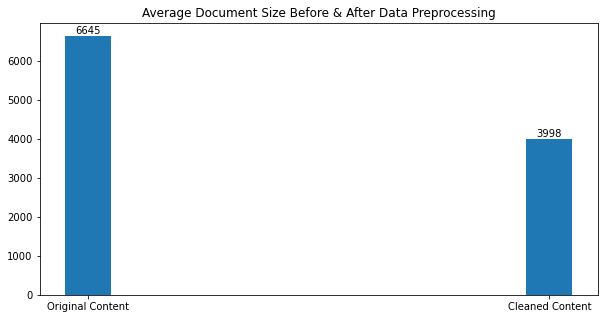

In [17]:
import matplotlib.pyplot as plt

data = {'Original Content':avg_lengthof_orginal_content, 'Cleaned Content':avg_lengthof_cleaned_content}

documents = list(data.keys())
avg_length = list(data.values())
  
plt.subplots(figsize=(10,5))

for i in range(len(avg_length)):
    plt.annotate(str(avg_length[i]), xy=(documents[i],avg_length[i]), ha='center', va='bottom')

# creating the bar plot
plt.bar(documents, avg_length,
        width = 0.1)
#plt.xlabel('Datasets')
#plt.ylabel('Average Length')
plt.title('Average Document Size Before & After Data Preprocessing')
plt.show()

In [18]:
df

,Models,Intents,Label,Content,Content_lower,Content_wo_punct,Content_wo_stopwords,Content_sorted,cleaned_content
0,P1-Ant2Maven.atl,Abstraction Category,1,module Ant2Maven;\n\n\n\ncreate OUTMaven : Mav...,module ant2maven;\n\n\n\ncreate outmaven : mav...,module antmaven create outmaven mavenmaven out...,module antmaven create outmaven mavenmaven out...,aattributes aauthor abasedir abasedir abasedir...,aattributes aauthor abasedir abasedir abasedir...
1,P1-Maven2XML.atl,Semantic Definition Category,2,module Maven2XML;\n\n\n\ncreate XML1 : XMLMav...,module maven2xml;\n\n\n\ncreate xml1 : xmlmav...,module mavenxml create xml xmlmaven xml xmlpro...,module mavenxml create xml xmlmaven xml xmlpro...,attaingoal attaingoal attaingoalattribute atta...,attaingoal attaingoal attaingoalattribute atta...
2,P46-Ant2XML.atl,Semantic Definition Category,2,module Ant2XML;\n\n\n\ncreate OUT : XML from I...,module ant2xml;\n\n\n\ncreate out : xml from i...,module antxml create out xml from in ant helpe...,module antxml create xml ant helper def concat...,acc acc acc ant antattribut antclasspath antco...,acc acc acc ant antattribut antclasspath antco...
3,P1-XML2Ant.atl,Refinement Category,0,module XML2Ant;\n\n\n\ncreate OUT : Ant from I...,module xml2ant;\n\n\n\ncreate out : ant from i...,module xmlant create out ant from in xml helpe...,module xmlant create ant xml helper defgetlist...,ant antattribut antclasspath antcopy antdelete...,ant antattribut antclasspath antcopy antdelete...
4,P59-XML2XML.atl,Editing Category,6,module XML2XML;\n\n\n\ncreate OUT : XML from I...,module xml2xml;\n\n\n\ncreate out : xml from i...,module xmlxml create out xml from in xml helpe...,module xmlxml create xml xml helper context xm...,attribute boolean children children context cr...,attribute boolean children children context cr...
...,...,...,...,...,...,...,...,...,...
169,P51-Table2SVGBarChart.atl,Language Translation Category,3,module Table2SVG; \n\ncreate OUT : SVG from IN...,module table2svg; \n\ncreate out : svg from in...,module tablesvg create out svg from in table h...,module tablesvg create svg table helper def al...,accincludingthismodulerowbarrowsindexofrowscal...,accincludingthismodulerowbarrowsindexofrowscal...
170,P51-Table2SVGPieChart.atl,Language Translation Category,3,module Table2SVG; \n\ncreate OUT : SVG from IN...,module table2svg; \n\ncreate out : svg from in...,module tablesvg create out svg from in table h...,module tablesvg create svg table helper def ra...,accincludingthismodulerowsectorrow accsequence...,accincludingthismodulerowsectorrow accsequence...
171,P51-Table2TabularHTML.atl,Language Translation Category,3,module Table2HTML; \n\ncreate OUT : HTML from ...,module table2html; \n\ncreate out : html from ...,module tablehtml create out html from in table...,module tablehtml create html table helper def ...,accincludingthismodulecelltdcell accincludingt...,accincludingthismodulecelltdcell accincludingt...
172,P53-METAH2ACME.atl,Editing Category,6,module METAH2ACME;\n\n\n\ncreate OUT : ACME fr...,module metah2acme;\n\n\n\ncreate out : acme fr...,module metahacme create out acme from in metah...,module metahacme create acme metah rule metahf...,aattvaluetostringconcat acme acmeacmefile acme...,aattvaluetostringconcat acme acmeacmefile acme...


In [19]:
df.drop(['Content','Content_lower','Content_wo_punct','Content_wo_stopwords','Content_sorted'], axis='columns', inplace=True)

In [20]:
df

,Models,Intents,Label,cleaned_content
0,P1-Ant2Maven.atl,Abstraction Category,1,aattributes aauthor abasedir abasedir abasedir...
1,P1-Maven2XML.atl,Semantic Definition Category,2,attaingoal attaingoal attaingoalattribute atta...
2,P46-Ant2XML.atl,Semantic Definition Category,2,acc acc acc ant antattribut antclasspath antco...
3,P1-XML2Ant.atl,Refinement Category,0,ant antattribut antclasspath antcopy antdelete...
4,P59-XML2XML.atl,Editing Category,6,attribute boolean children children context cr...
...,...,...,...,...
169,P51-Table2SVGBarChart.atl,Language Translation Category,3,accincludingthismodulerowbarrowsindexofrowscal...
170,P51-Table2SVGPieChart.atl,Language Translation Category,3,accincludingthismodulerowsectorrow accsequence...
171,P51-Table2TabularHTML.atl,Language Translation Category,3,accincludingthismodulecelltdcell accincludingt...
172,P53-METAH2ACME.atl,Editing Category,6,aattvaluetostringconcat acme acmeacmefile acme...


In [21]:
#tokenize the cleaned content

df['tokenize_content'] = df.apply(lambda row: nltk.word_tokenize(row['cleaned_content']), axis=1)

In [22]:
df.shape

(174, 5)

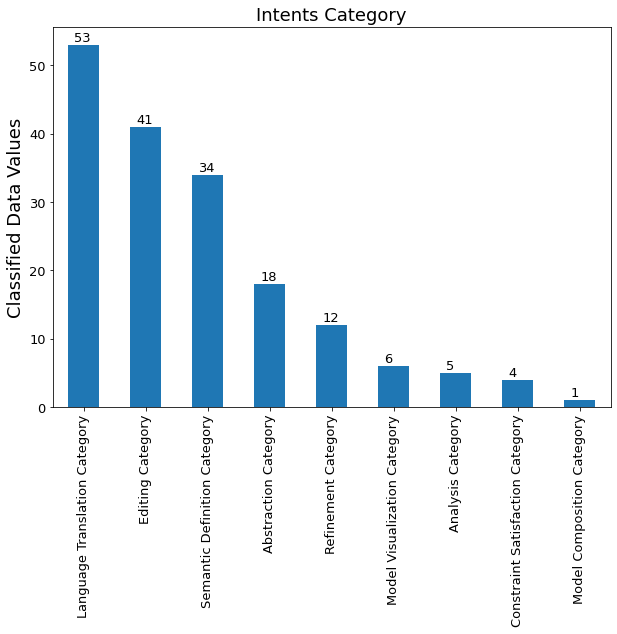

In [23]:
Intent_plot = df['Intents'].value_counts().plot(kind='bar', figsize=(10,7), fontsize=13)

Intent_plot.set_alpha(0.8)
Intent_plot.set_title("Intents Category", fontsize=18)
Intent_plot.set_ylabel("Classified Data Values", fontsize=18);

for i in Intent_plot.patches:
    # get_width pulls left or right; get_y pushes up or down
    Intent_plot.text(i.get_x()+.10, i.get_height()+.5, \
            str(round((i.get_height()), 2)), fontsize=13)

In [24]:
data = df[['cleaned_content','Intents']]

In [25]:
data.shape

(174, 2)

In [26]:
#Classification

data = df[['cleaned_content', 'Intents']]

In [27]:
data

,cleaned_content,Intents
0,aattributes aauthor abasedir abasedir abasedir...,Abstraction Category
1,attaingoal attaingoal attaingoalattribute atta...,Semantic Definition Category
2,acc acc acc ant antattribut antclasspath antco...,Semantic Definition Category
3,ant antattribut antclasspath antcopy antdelete...,Refinement Category
4,attribute boolean children children context cr...,Editing Category
...,...,...
169,accincludingthismodulerowbarrowsindexofrowscal...,Language Translation Category
170,accincludingthismodulerowsectorrow accsequence...,Language Translation Category
171,accincludingthismodulecelltdcell accincludingt...,Language Translation Category
172,aattvaluetostringconcat acme acmeacmefile acme...,Editing Category


In [28]:
#split data using train_test_split

from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.33, random_state=42, shuffle=True)

In [29]:
train.Intents.unique()

array(['Abstraction Category', 'Model Composition Category',
       'Constraint Satisfaction Category',
       'Language Translation Category', 'Editing Category',
       'Semantic Definition Category', 'Refinement Category',
       'Analysis Category', 'Model Visualization Category'], dtype=object)

In [30]:
test.Intents.unique()

array(['Abstraction Category', 'Language Translation Category',
       'Editing Category', 'Semantic Definition Category',
       'Model Visualization Category', 'Analysis Category',
       'Constraint Satisfaction Category', 'Refinement Category'],
      dtype=object)

In [31]:
#Feature selection by vectorization

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(2, 2))
X_train_counts = count_vect.fit_transform(train.cleaned_content)
X_train_counts.shape

(116, 14622)

In [32]:
#Feature selection by tf-idf

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(116, 14622)

In [33]:
#Classifier Mulitnomial Naive Bayes Pipeline

from sklearn.naive_bayes import MultinomialNB
#classify = MultinomialNB().fit(X_train_tfidf, train.Intent)

from sklearn.pipeline import Pipeline
text_classify = Pipeline([('vect', CountVectorizer(ngram_range=(2, 2))),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
text_classify = text_classify.fit(train.cleaned_content, train.Intents)

In [34]:
#Calculating Mean

predicted = text_classify.predict(test.cleaned_content)
multinomial_pipeline_mean = np.mean(predicted == test.Intents)
multinomial_pipeline_mean

0.3620689655172414

In [35]:
from sklearn.metrics import classification_report

print(classification_report(test.Intents, predicted, target_names=['1','2','3','4','5','6','7','8']))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.86      0.80      0.83        15
           5       0.20      0.90      0.33        10
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        16

    accuracy                           0.36        58
   macro avg       0.13      0.21      0.15        58
weighted avg       0.26      0.36      0.27        58



C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
#Classifier SGDC Pipeline in SKlearn

from sklearn.linear_model import SGDClassifier
text_classify_SGDC = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=1000, random_state=42)),])
_ = text_classify_SGDC.fit(train.cleaned_content, train.Intents)
predicted_SGDC = text_classify_SGDC.predict(test.cleaned_content)
np.mean(predicted_SGDC == test.Intents)

0.5689655172413793

In [37]:
from sklearn.metrics import classification_report

print(classification_report(test.Intents, predicted_SGDC, target_names=['1','2','3','4','5','6','7','8']))

              precision    recall  f1-score   support

           1       1.00      0.12      0.22         8
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.82      0.93      0.87        15
           5       0.25      0.50      0.33        10
           6       1.00      0.33      0.50         3
           7       0.33      0.67      0.44         3
           8       0.80      0.50      0.62        16

    accuracy                           0.57        58
   macro avg       0.65      0.51      0.50        58
weighted avg       0.72      0.57      0.57        58





=============confusion Matrix=================



	********SGDC Matrix********




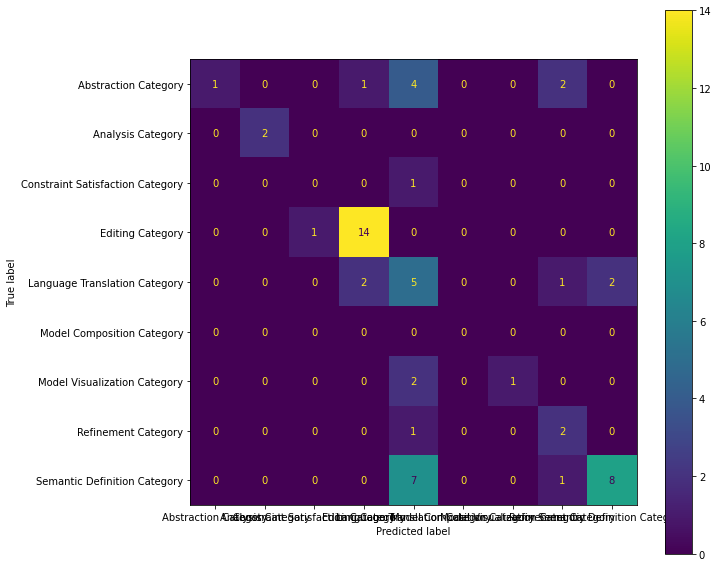

In [44]:
#Displaying Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(test.Intents, predicted_SGDC, labels=text_classify_SGDC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=text_classify_SGDC.classes_)
#disp.plot() 

fig, ax = plt.subplots(figsize=(10,10))

print('\n\n=============confusion Matrix=================\n\n')
print('\n\t********SGDC Matrix********\n\n')

disp.plot(ax=ax)



=============confusion Matrix=================



	********SGDC Matrix********




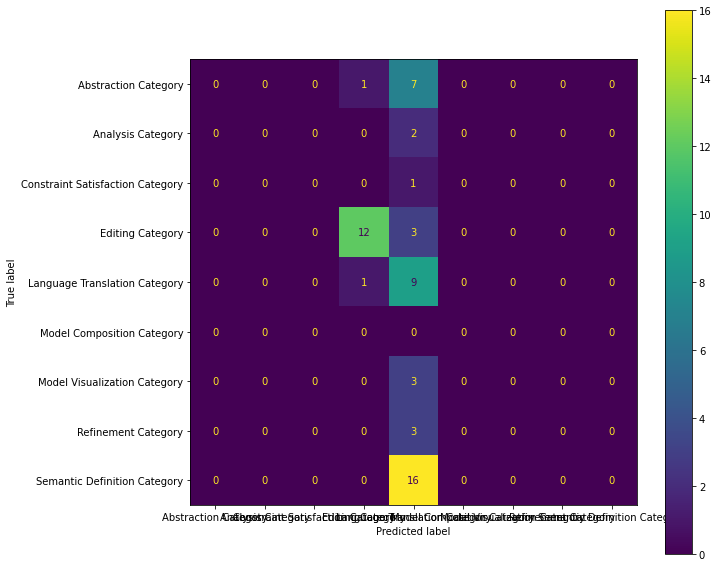

In [45]:
#Displaying Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(test.Intents, predicted, labels=text_classify.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=text_classify.classes_)
#disp.plot() 

fig, ax = plt.subplots(figsize=(10,10))

print('\n\n=============confusion Matrix=================\n\n')
print('\n\t********Multinomial Matrix********\n\n')

disp.plot(ax=ax)

In [39]:
#split the data into input and output

#Implementing Bag_of_words

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
X = vectorizer.fit_transform(df.cleaned_content).toarray()
y = data['Intents']

metrics = []

In [40]:
#Apply Stratified KFold for splitting dataset

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target variable
count_train_index=1
count_test_index=1
for train_index, test_index in skf.split(X,y): 
    print("Train:", count_train_index, train_index,"\n\n")
    print("Testing:", count_test_index, test_index,"\n\n")
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    count_train_index+=1 
    count_test_index+=1

Train: 1 [ 19  20  22  23  24  32  33  34  35  36  37  38  39  40  41  42  43  44
  45  46  47  51  53  54  55  56  60  61  62  63  64  65  66  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173] 


Testing: 1 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 25 26 27 28
 29 30 31 48 49 50 52 57 58 59 67] 


Train: 2 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  21  25  26  27  28  29  30  31  41  42  43  44  45  46  47  48  49
  50  51  52  54  55  56  57  58  59  67  72  77  79  80  81  82  84  85
  87  88  89  90  91  92  93  94  95  98  99 100 101 102 103 104 105 106


C:\Users\abhid\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [41]:
#Implementing multinomial naive bayes

from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
vect = CountVectorizer(ngram_range=(1, 2), max_features=10, stop_words="english")
#X_train_dtm = vect.fit_transform(X_train)
#X_test_dtm = vect.transform(X_test)
nb = MultinomialNB()
#nb.fit(X_train_dtm, y_train)
nb.fit(X_train, y_train)
#y_pred_class = nb.predict(X_test_dtm)
y_pred_class = nb.predict(X_test)

metrics.append(accuracy_score(y_test, y_pred_class))

metrics = np.array(metrics)

print("Mean accuracy: ", np.mean(metrics, axis=0))
print("Std for accuracy: ", np.std(metrics, axis=0))


Mean accuracy:  0.20588235294117646
Std for accuracy:  0.0


In [42]:
from sklearn.metrics import classification_report
print('\n===============Classification Score Report================\n\n')
print('\n\t***********Multinomial NB without pipeline***********\n')
print(classification_report(y_test, y_pred_class, target_names=['1','2','3','4','5','6','7','8','9']))
print('\n\t***********SGDC sklearn pipeline***********\n')
print(classification_report(test.Intents, predicted_SGDC, target_names=['1','2','3','4','5','6','7','8']))
print('\n\t***********Multinomial NB with pipeline***********\n')
print(classification_report(test.Intents, predicted, target_names=['1','2','3','4','5','6','7','8']))

C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



===============Classification Score Report================



	***********Multinomial NB without pipeline***********

              precision    recall  f1-score   support

           1       0.17      0.33      0.22         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.50      0.40      0.44        10
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.33      0.14      0.20         7

    accuracy                           0.21        34
   macro avg       0.22      0.21      0.21        34
weighted avg       0.26      0.21      0.22        34


	***********SGDC sklearn pipeline***********

              precision    recall  f1-score   support

           1       1.00      0.12      0.22         8
           2       1

C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhid\anaconda3\lib\site-packages\sklearn\metrics\_cla